In [9]:
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [7]:
#Getting stock price data

start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()
df = web.DataReader("AAPL", 'yahoo', start, end)  # Collects data


#prices in USD

In [8]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.783936
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.444603
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.720840
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.308266
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.958794


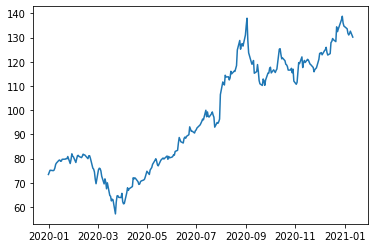

In [10]:
plt.plot(df["High"])

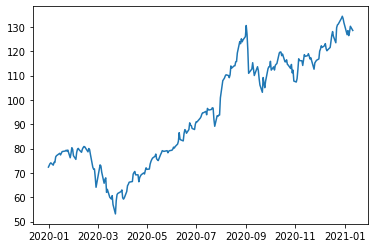

In [11]:
plt.plot(df["Low"])

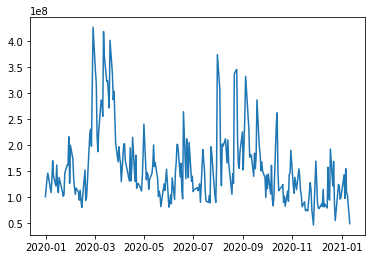

In [12]:
plt.plot(df["Volume"])

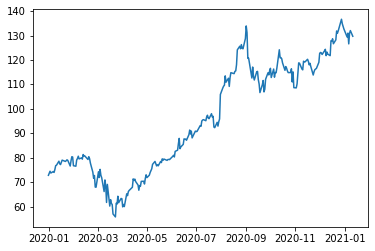

In [13]:
plt.plot(df["Adj Close"])

In [14]:
df["HL_PCT"]= ((df['High']- df["Low"])/ df["Close"])*100

In [15]:
df["PCT_CNG"]= ((df['Close']- df["Open"])/ df["Open"])*100

In [16]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,HL_PCT,PCT_CNG
Date,,,,,,,,
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.783936,1.416654,1.283069
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.444603,1.801233,1.387394
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.720840,1.371747,0.094228
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.308266,2.404934,2.045672
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.958794,1.146145,-0.483585


In [17]:
data= df[["Close","Volume","Adj Close","HL_PCT","PCT_CNG"]]

In [18]:
data.head()

,Close,Volume,Adj Close,HL_PCT,PCT_CNG
Date,,,,,
2019-12-31,73.412498,100805600.0,72.783936,1.416654,1.283069
2020-01-02,75.087502,135480400.0,74.444603,1.801233,1.387394
2020-01-03,74.357498,146322800.0,73.720840,1.371747,0.094228
2020-01-06,74.949997,118387200.0,74.308266,2.404934,2.045672
2020-01-07,74.597504,108872000.0,73.958794,1.146145,-0.483585


In [19]:
X=data.drop("Close", axis=1).values

In [20]:
y=data["Close"].values

In [21]:
X

array([[ 1.00805600e+08,  7.27839355e+01,  1.41665375e+00,
         1.28306878e+00],
       [ 1.35480400e+08,  7.44446030e+01,  1.80123308e+00,
         1.38739401e+00],
       [ 1.46322800e+08,  7.37208405e+01,  1.37174686e+00,
         9.42280953e-02],
       ...,
       [ 1.09578200e+08,  1.30919998e+02,  2.87962445e+00,
         1.99438886e+00],
       [ 1.04965400e+08,  1.32050003e+02,  1.81750026e+00,
        -2.86936227e-01],
       [ 4.91643550e+07,  1.29717194e+02,  1.28741466e+00,
         4.08074272e-01]])

In [22]:
y

array([ 73.41249847,  75.08750153,  74.35749817,  74.94999695,
        74.59750366,  75.79750061,  77.40750122,  77.58249664,
        79.23999786,  78.16999817,  77.83499908,  78.80999756,
        79.68250275,  79.14250183,  79.42500305,  79.80750275,
        79.57749939,  77.23750305,  79.42250061,  81.08499908,
        80.96749878,  77.37750244,  77.16500092,  79.71250153,
        80.36250305,  81.30249786,  80.00749969,  80.38749695,
        79.90249634,  81.80000305,  81.21749878,  81.23750305,
        79.75      ,  80.90499878,  80.07499695,  78.26249695,
        74.54499817,  72.01999664,  73.16249847,  68.37999725,
        68.33999634,  74.70249939,  72.33000183,  75.68499756,
        73.23000336,  72.25749969,  66.54250336,  71.33499908,
        68.85749817,  62.05749893,  69.49250031,  60.55250168,
        63.21500015,  61.66749954,  61.19499969,  57.31000137,
        56.09249878,  61.72000122,  61.38000107,  64.61000061,
        61.93500137,  63.70249939,  63.57249832,  60.22

In [23]:
#to split data into training and testing sets

from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=7)

In [25]:
from sklearn.linear_model import LinearRegression


In [26]:
reg = LinearRegression().fit(X_train, y_train)

In [27]:
y_pred= reg.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(y_test, y_pred)


0.013143474042966358